<a href="https://colab.research.google.com/github/eliss115/Klasifikasi-kucing-dan-anjing-Algoritma-CNN/blob/main/Algoritma_Convolutional_Neural_Network_(CNN)_Untuk_Klasifikasi_Citra_Kucing_dan_Anjing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(32, (3,3), input_shape = (128, 128, 3), activation = 'relu'))

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/training_set',
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/dataset/test_set',
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='binary')

Mounted at /content/drive
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
print(training_set.n)
print(training_set.batch_size)

8000
32


In [ ]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size
classifier.fit(training_set,
               #steps_per_epoch = 8000,
               steps_per_epoch=STEP_SIZE_TRAIN,
               epochs=50,
               validation_data=test_set,
               validation_steps=STEP_SIZE_VALID)

Epoch 1/50
250/250 [==============================] - 3625s 14s/step - loss: 1.0266 - accuracy: 0.5936 - val_loss: 0.6012 - val_accuracy: 0.6709
Epoch 2/50
250/250 [==============================] - 233s 932ms/step - loss: 0.6010 - accuracy: 0.6754 - val_loss: 0.5501 - val_accuracy: 0.7319
Epoch 3/50
250/250 [==============================] - 230s 918ms/step - loss: 0.5738 - accuracy: 0.7036 - val_loss: 0.5724 - val_accuracy: 0.7046
Epoch 4/50
250/250 [==============================] - 231s 921ms/step - loss: 0.5534 - accuracy: 0.7211 - val_loss: 0.5579 - val_accuracy: 0.7298
Epoch 5/50
250/250 [==============================] - 231s 923ms/step - loss: 0.5401 - accuracy: 0.7331 - val_loss: 0.6021 - val_accuracy: 0.7026
Epoch 6/50
250/250 [==============================] - 226s 903ms/step - loss: 0.5241 - accuracy: 0.7366 - val_loss: 0.5397 - val_accuracy: 0.7248
Epoch 7/50
250/250 [==============================] - 236s 945ms/step - loss: 0.5215 - accuracy: 0.7464 - val_loss: 0.5387 - 

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16258177 (62.02 MB)
Trainable params: 16258177 (62.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
classifier.save('/content/drive/My Drive/Colab Notebooks/model/model_50_epoch.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/My Drive/Colab Notebooks/model/model_50_epoch.h5')

Mounted at /content/drive


In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16258177 (62.02 MB)
Trainable params: 16258177 (62.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

1/1 [==============================] - 0s 40ms/step


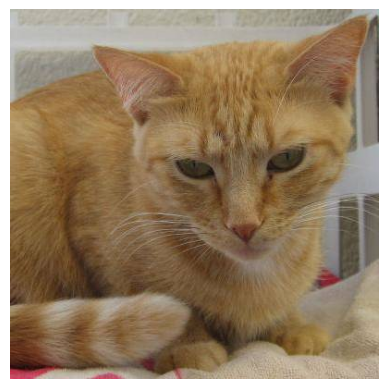

0.0
Cat


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2,cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io

url = '/content/drive/My Drive/Colab Notebooks/dataset/single_prediction/cat_or_dog_6.jpg'
test_image = image.load_img(url, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = new_model.predict(test_image)
image = mpimg.imread(url)
plt.axis("off")
plt.imshow(image)
plt.show()

print (result[0][0])

if result[0][0] == 1.0:
  print ('Dog')
else:
  print('Cat')